In [13]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [14]:
# Reading the file into a variable
with open('sat1_sspa.txt') as f:
    data = f.readlines()


In [15]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
# Values that have to be replaced by 1 while preprocessing. All negative values are replaced by 0
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1']

rows = []
for i in data:
    # if line that is being read contains _, its a column name
    if '_' in i:
        columns.append(i.strip())
    elif len(i.split("\t"))>5:
        #Split the line at tab space (\t) and format the date
        new_list = [j.strip() for j in i.split("\t") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        # Replacing positve values with and negative with 0 for better analysing
        for j in range(6,len(new_list),1):
            if new_list[j] in positive_value:
                new_list[j] = '1'
            else: 
                new_list[j] = '0'
            
        rows.append(new_list)


        
        

        

In [16]:
#Make date one column instead of different columns for date, year, time etc.
columns = ['Date']+columns[6:]

In [17]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        # If no value is found, replace with Not a number, This will later be replaced by the mean of values in the column
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = np.nan
        # First column is date, convert all values into float except for the first column
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe instead of 0,1,2,3,4...
df.set_index('Date', inplace=True)
original_df = df.copy()
deviation_df = df.copy()

for column in df.columns:
    # Filling blank values with mean
    df[column].fillna(value = df[column].mean(), inplace=True)
    # Replacing each value in the deviation df to difference between mean and the value
    deviation_df[column] = df[column] - df[column].mean()

In [18]:
# Display the df (Optional)
display(deviation_df)

,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:27.094,-15.152945,0.000000,-7.105427e-15,0.00000,0.823744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.982905,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-05-15 00:00:27.606,-14.152945,0.805804,8.212435e-01,0.00000,0.823744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.982905,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-05-15 00:00:28.118,-13.152945,0.805804,8.212435e-01,0.00000,0.823744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.982905,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-05-15 00:00:29.142,-11.152945,0.805804,8.212435e-01,0.00000,0.823744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.982905,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-05-15 00:00:30.166,-9.152945,0.805804,8.212435e-01,0.00000,0.823744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.982905,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,3.847055,0.765804,7.512435e-01,0.91702,0.753744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-06-16 23:59:57.448,4.847055,0.765804,7.512435e-01,0.91702,0.753744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.57599
2018-06-16 23:59:57.960,5.847055,0.765804,7.512435e-01,0.91702,0.753744,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.57599


/home/aravind/.local/lib/python3.8/site-packages/adtk/visualization/_visualization.py:247: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(


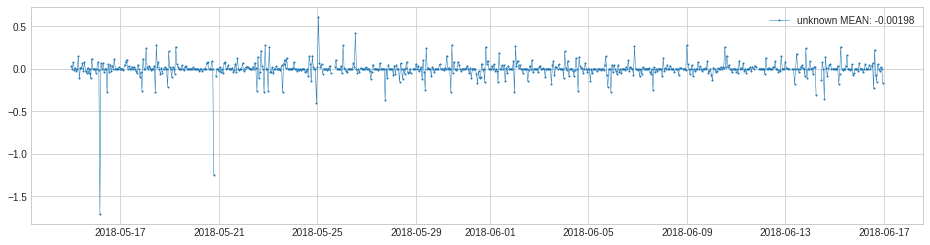

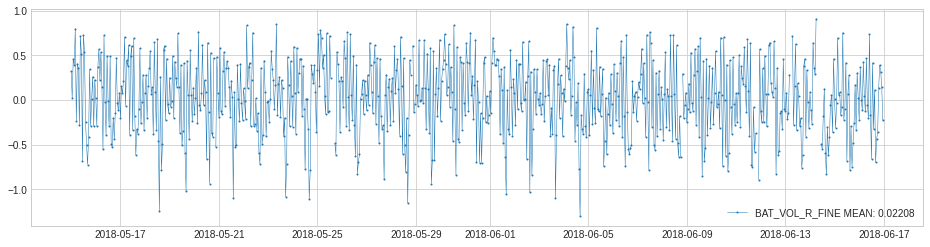

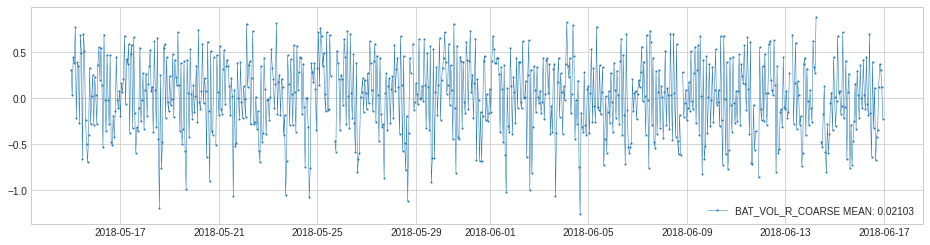

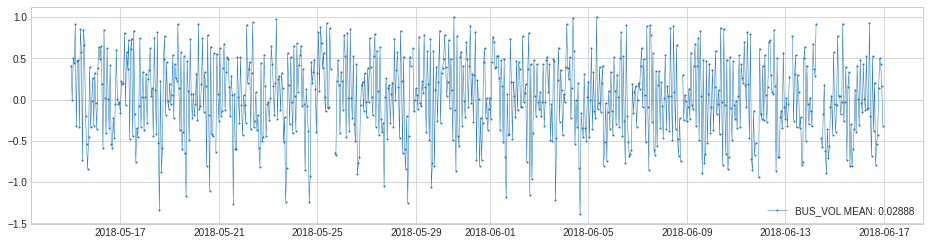

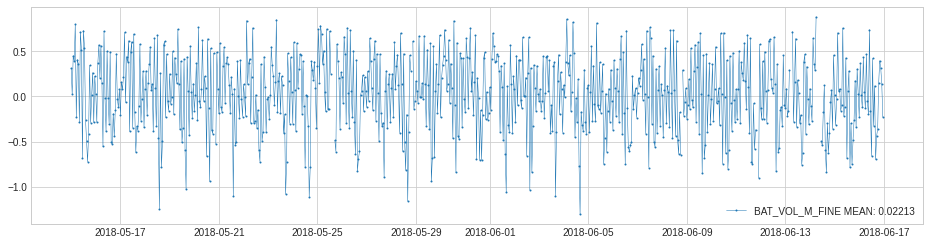

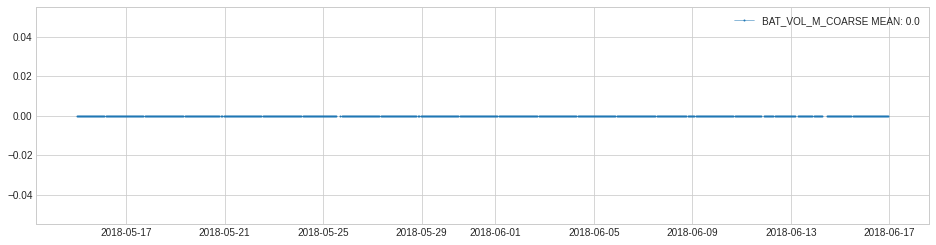

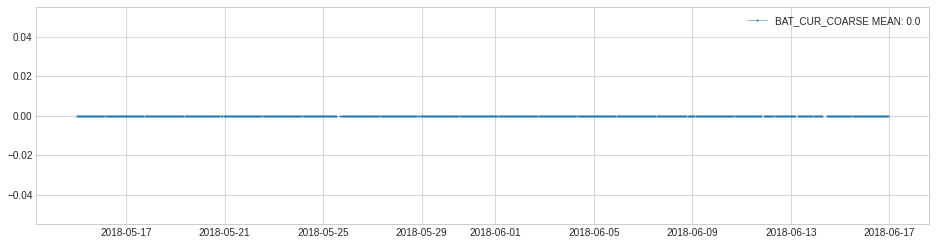

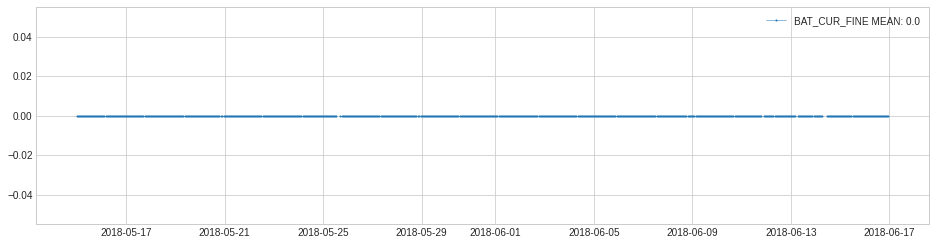

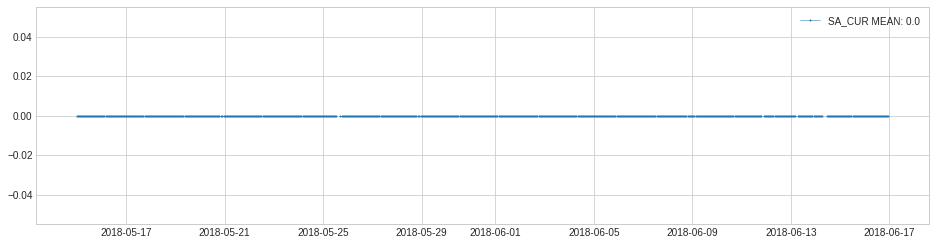

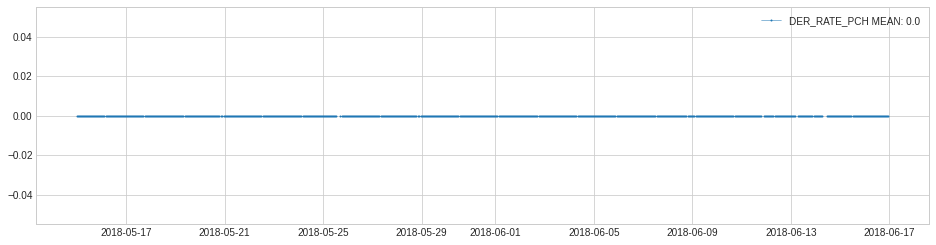

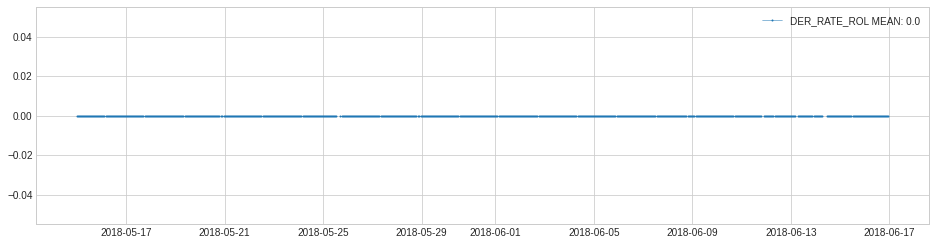

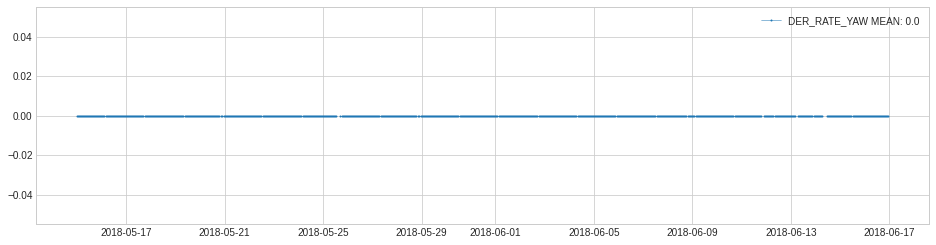

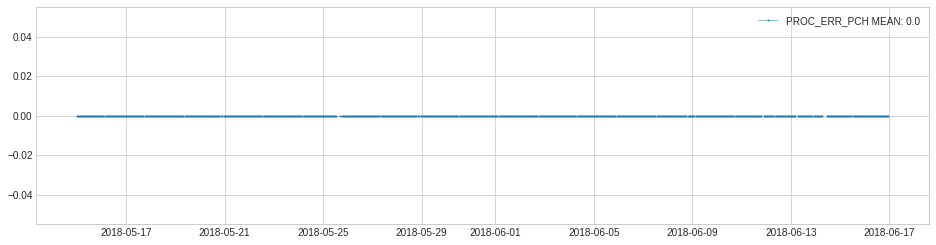

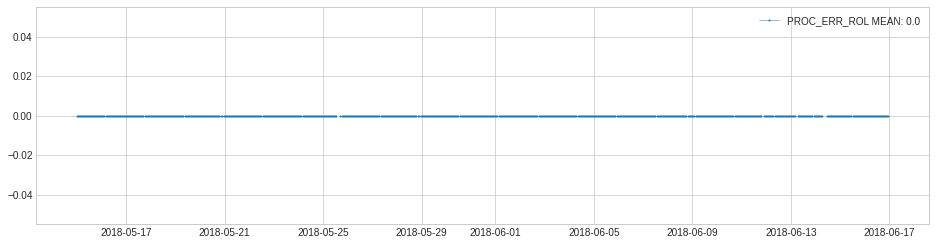

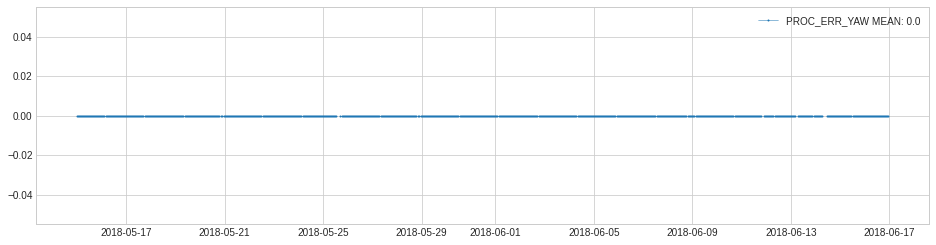

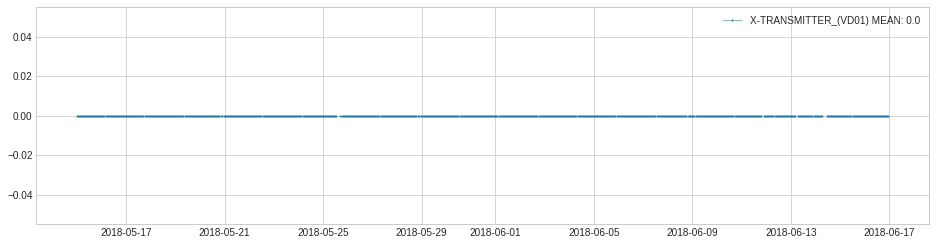

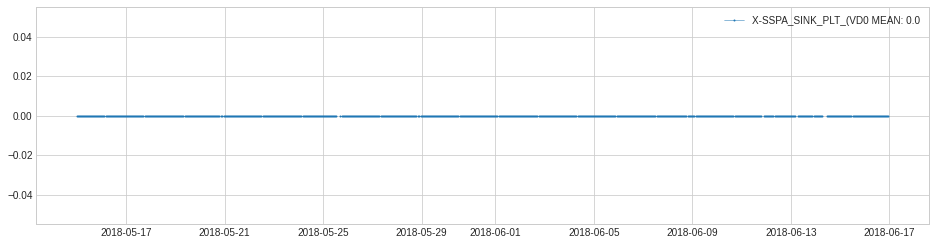

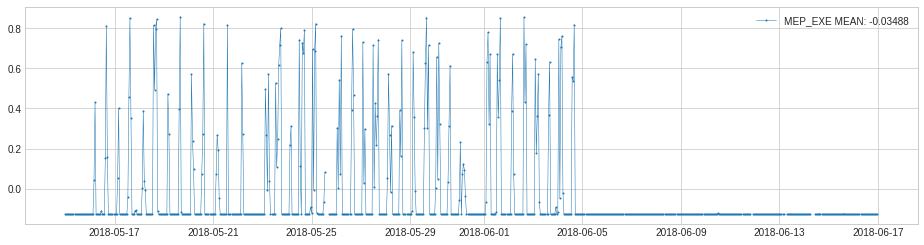

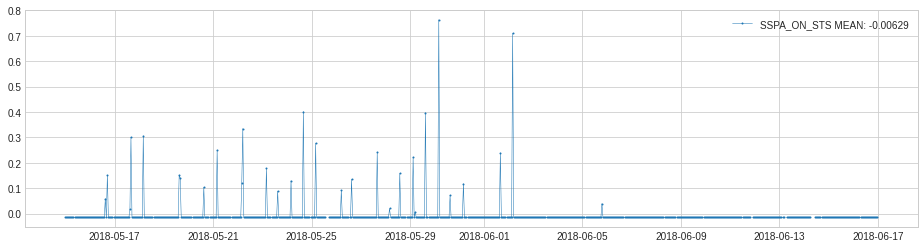

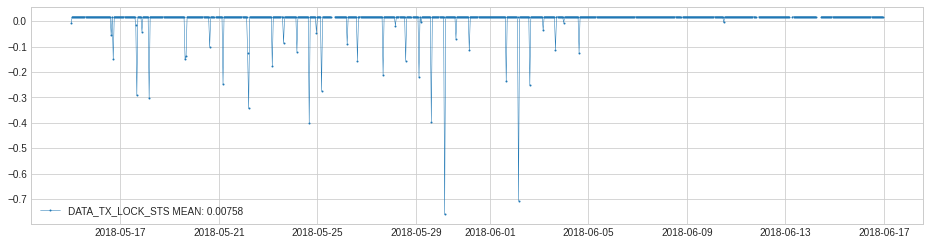

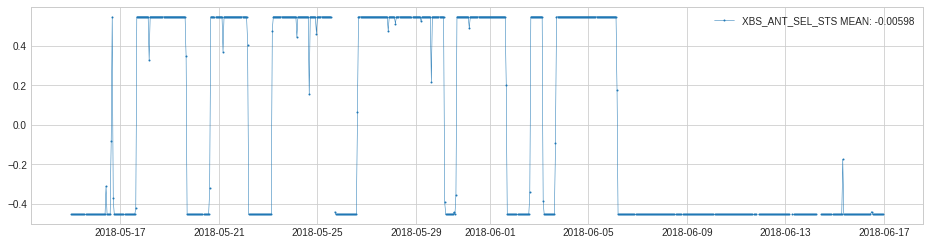

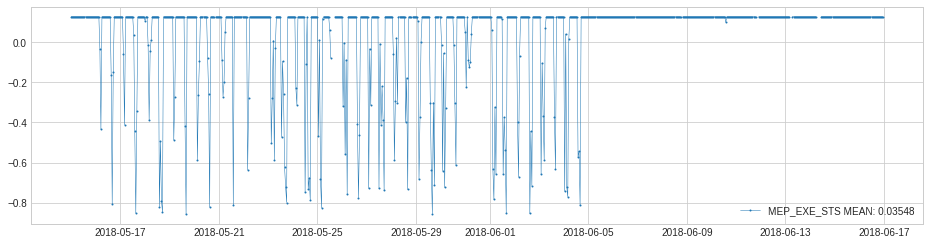

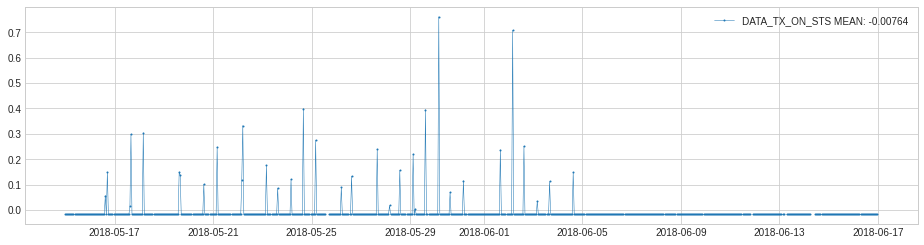

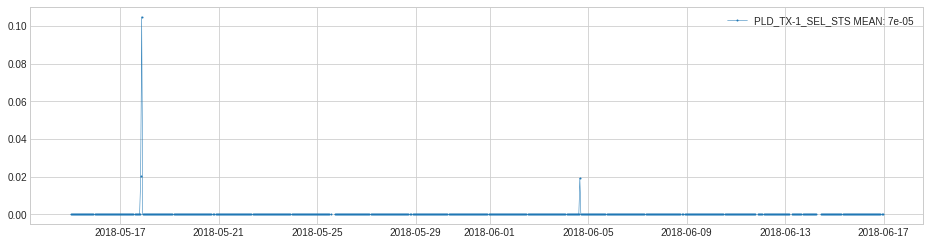

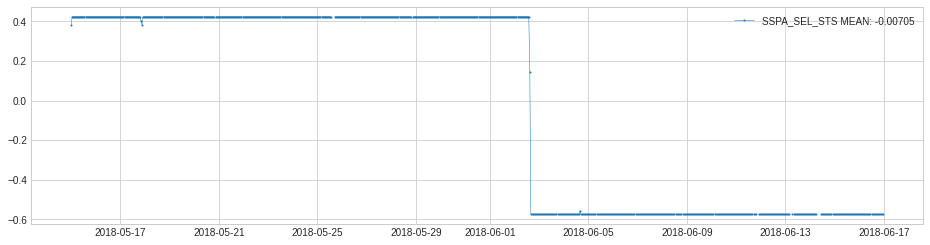

In [25]:
#Plotting the deviation dataframe
from adtk.visualization import plot
df_remsampled = deviation_df.resample('H').mean()
for column in df_remsampled: 
    new_column_name = column + ' MEAN: '+ str(round(df_remsampled[column].mean(), 5))
    df_remsampled = df_remsampled.rename({column: new_column_name}, axis=1)
    plot(df_remsampled[new_column_name],legend=True)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

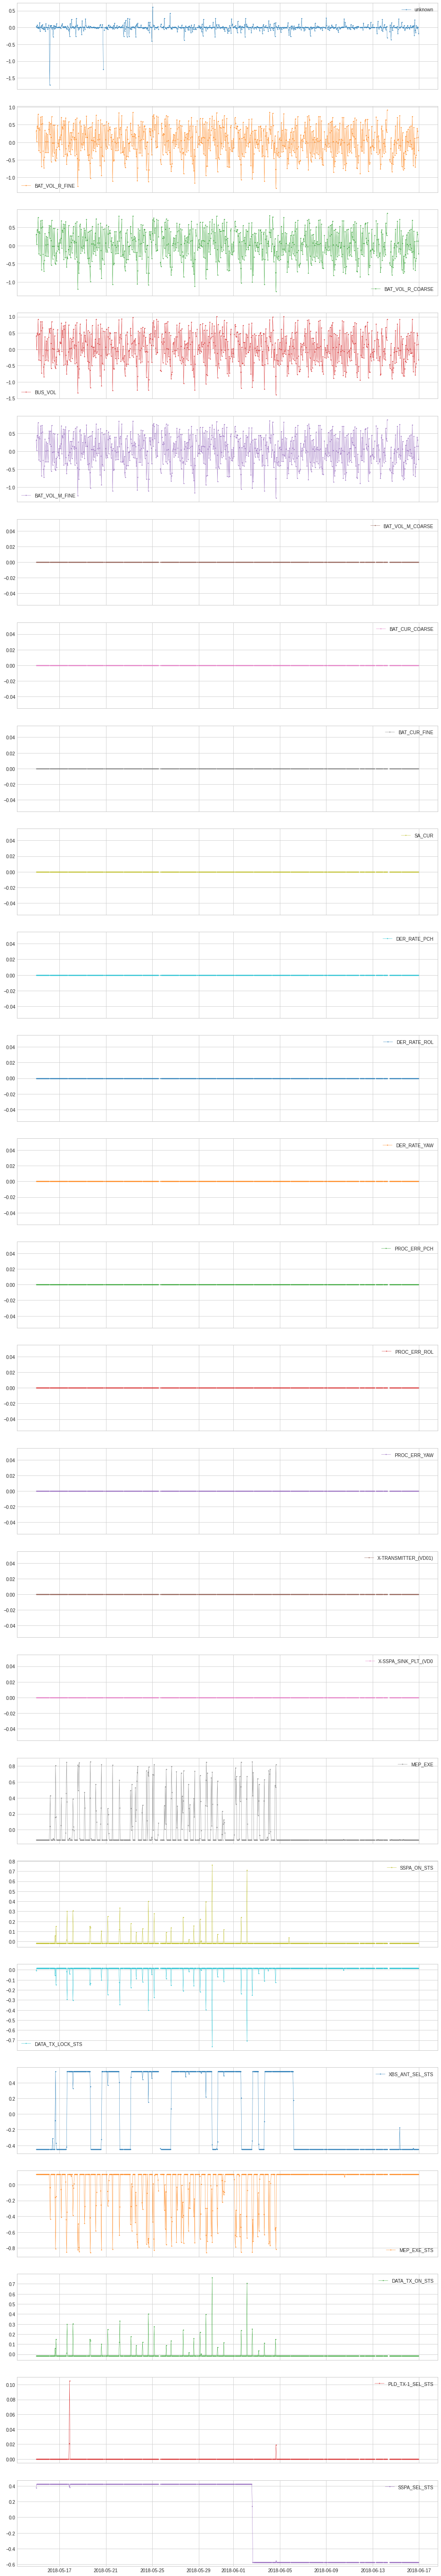

In [60]:
#Plotting the deviation dataframe
from adtk.visualization import plot
plot(deviation_df.resample('H').mean(),legend=True)


Anomalies detected at
DatetimeIndex(['2018-05-15 01:00:00', '2018-05-16 04:00:00',
               '2018-05-16 05:00:00', '2018-05-16 06:00:00',
               '2018-05-16 12:00:00', '2018-05-16 13:00:00',
               '2018-05-16 15:00:00', '2018-05-16 16:00:00',
               '2018-05-16 17:00:00', '2018-05-16 18:00:00',
               ...
               '2018-06-06 04:00:00', '2018-06-06 05:00:00',
               '2018-06-10 12:00:00', '2018-06-10 13:00:00',
               '2018-06-10 15:00:00', '2018-06-13 12:00:00',
               '2018-06-14 16:00:00', '2018-06-15 08:00:00',
               '2018-06-15 09:00:00', '2018-06-15 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=193, freq=None)


,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:00:00,0.034900,0.324627,0.311875,0.409387,0.314684,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,-0.007767,-0.452869,0.128116,-0.016935,-0.000112,0.379811
2018-05-15 01:00:00,0.000901,0.024403,0.031903,-0.009024,0.025036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,0.424010
2018-05-15 02:00:00,0.074704,0.459251,0.442488,0.497539,0.452260,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,0.424010
2018-05-15 03:00:00,-0.011324,0.390950,0.378206,0.440020,0.389528,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,0.424010
2018-05-15 04:00:00,0.012321,0.798577,0.771430,0.915165,0.801821,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,0.424010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 19:00:00,0.000901,0.134650,0.125918,0.145541,0.150105,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.575990
2018-06-16 20:00:00,-0.023316,0.393065,0.373573,0.497824,0.396464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.575990
2018-06-16 21:00:00,0.020666,0.315503,0.308535,0.424746,0.315781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.127686,-0.014868,0.017095,-0.452869,0.128116,-0.016935,-0.000112,-0.575990


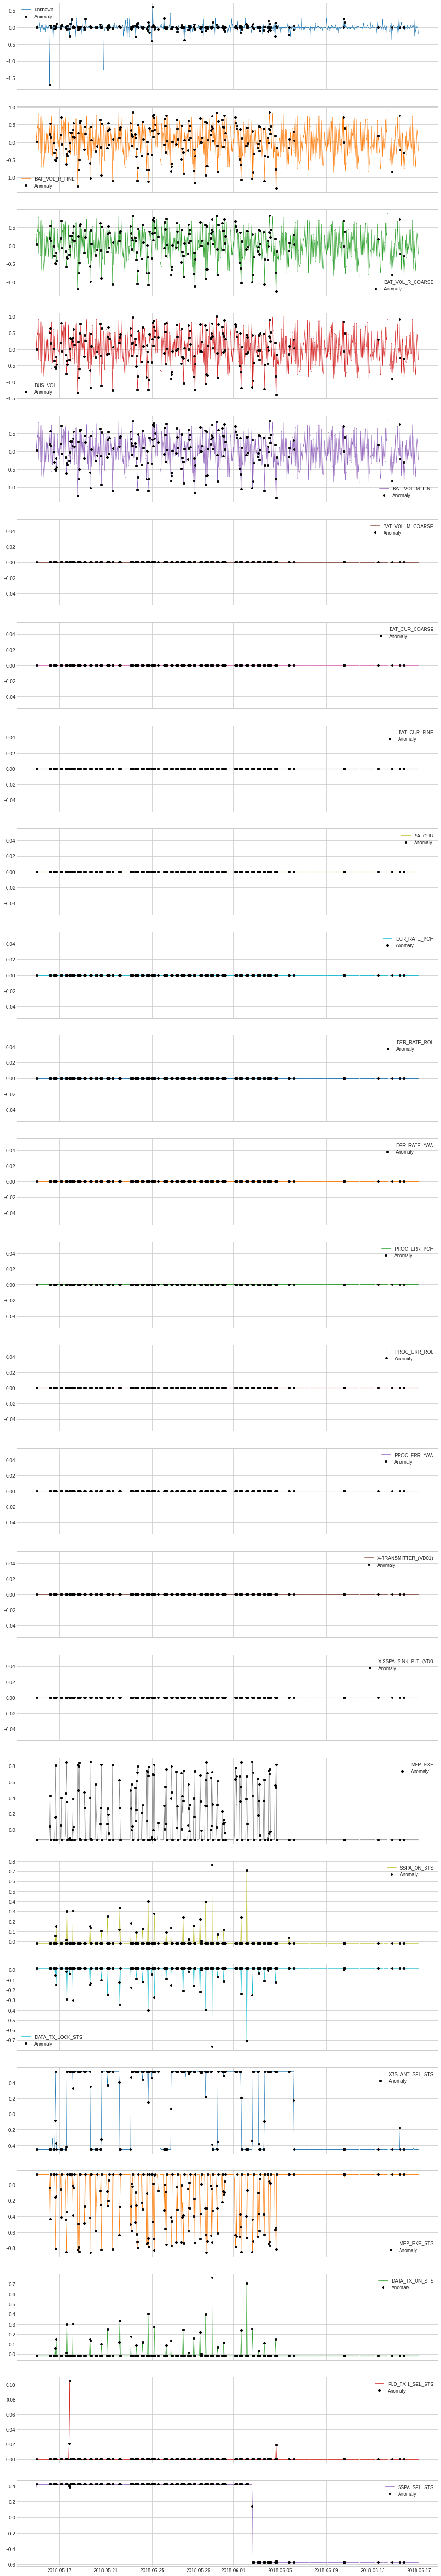

In [62]:
#Use resampling, autoregression from adtk and plot with anomalies
from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD
df_resampled = deviation_df.resample('H').mean()

def myDetectionFunc1(df):
    ano = pd.Series()
    for column in deviation_df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_resampled)
print('Anomalies detected at')
print(anomalies1[anomalies1].index)
plot(deviation_df.resample('H').mean(),legend=True, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

